# Import Data

In [1]:
# import the required modules
import pandas as pd
import numpy as np
import pymysql

CC_GENERAL = pd.read_csv('CC GENERAL.csv')
CC_GENERAL

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [2]:
# 列名
list(CC_GENERAL.columns)

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [5]:
# View data description
CC_GENERAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
#View the null data
CC_GENERAL.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#View the describe data
CC_GENERAL.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot: >

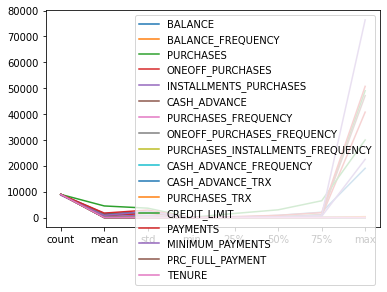

In [7]:
CC_GENERAL.describe().plot()

In [8]:
# MINIMUM_PAYMENTS describe
CC_GENERAL.MINIMUM_PAYMENTS.describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

# Data cleaning

Delete duplicate records; Clean the data, adjust the scale and center of the data, and search for data points too far from zero. And these data points too far from zero will be seen as outliers and eliminated; Check whether there are empty values and use the mean values to fill in the empty values; 0-1 standardized processing of data; Correlation analysis of continuous features, eliminating variables with high correlation; Perform statistical mapping to view the data distribution before and after the analysises.

## Descriptive Statistics for Continuous Fields

In [10]:
CC_GENERAL.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Analysis: Through descriptive statistics of variables, it can be seen that there are no logical outliers in each field;
The average value of BALANCE_FREQUENCY is about 0.877271, indicating that the proportion of cardholders with frequent balance changes is about 87.72%;
The median number of CASH_ADVANCE is 0, indicating that at least half of cardholders do not have the habit of using credit cards to advance cash;
The average value of PURCHASES_FREQUENCY is about 0.490351, indicating that the proportion of cardholders who purchase frequently is about 49%;
The average value of ONEOFF_PURCHASES_FREQUENCY is about 0.202458, indicating that only about 20% of cardholders pay in full when using credit cards for shopping;
The average value of PURCHASES_INSTALLMENTS_FREQUENCY is about 0.364437, indicating that about 36% of cardholders use installment payment when shopping with credit cards;
The average value of CASH_ADVANCE_FREQUENCY is about 0.135144, indicating that only about 13% of cardholders frequently advance cash from credit cards;
The median number of PRC_FULL_PAYMENT is 0, indicating that at least half of cardholders have never paid off the current bill at one time.


##  Delete duplicate records

In [11]:
CC_GENERAL.drop_duplicates(inplace=True)

## Processing missing values

In [12]:
CC_GENERAL.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Fill missing values: Use the rest of the fields to fit and fill the two fields with missing values, "CREDIT_LIMIT" and "MINIMUM_PAYMENTS".

In [13]:
def fillna(usedf,df):
    colnums=usedf.columns
    nanresults=usedf.isnull().sum()
    nancols=nanresults[nanresults.values!=0].index.values 
    for i in nancols:
        nottreatnancols=np.setdiff1d(nancols,[i])
       
        nottreatnotnan=usedf.drop(nottreatnancols,axis=1)
        known=nottreatnotnan.dropna()
        unknown=nottreatnotnan[nottreatnotnan[i].isnull()] 
        xknown=known.loc[:,np.setdiff1d(known.columns,[i])]
        yknown=known.loc[:,i]
        xunknown=unknown.loc[:,np.setdiff1d(unknown.columns,[i])]
      
        from sklearn.neighbors import KNeighborsRegressor
        knn=KNeighborsRegressor()
        knn.fit(xknown,yknown)
        yfillna=knn.predict(xunknown).reshape(-1,1) 
        df.loc[np.in1d(df.index.values,unknown.index.values),i]=yfillna #用index定位df中存在缺失值的记录
fillna(CC_GENERAL.iloc[:,1:],CC_GENERAL)
CC_GENERAL.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Correlation Analysis of Continuous Features

<AxesSubplot: >

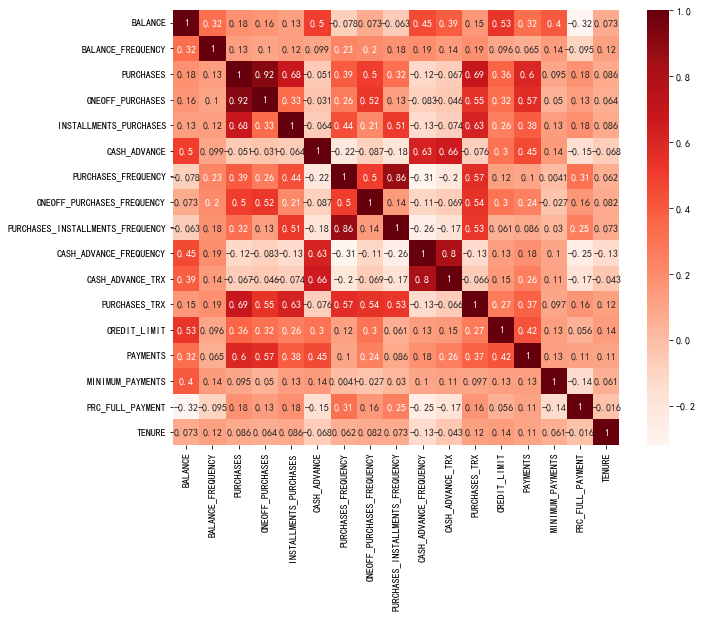

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,8))
sns.heatmap(CC_GENERAL.corr(),annot=True,cmap='Reds')

From the heat map of the correlation matrix, it can be seen that there is a high correlation between PURCHASES， ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES , and between PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY, so the correlated fields can be used as a ratio to convert the absolute amount into a relative amount, which not only realizes the merging of fields, but also helps to eliminate the influence of feature collinearity, and can also improve the comparability of different cardholder data.

## Derived Features

In [15]:
CC_GENERAL['PURCHASES_Rate']=CC_GENERAL.PURCHASES/CC_GENERAL.CREDIT_LIMIT
CC_GENERAL['INSTALLMENTS_Rate']=CC_GENERAL.INSTALLMENTS_PURCHASES/CC_GENERAL.CREDIT_LIMIT
CC_GENERAL['CASH_ADVANCE_Rate']=CC_GENERAL.CASH_ADVANCE/CC_GENERAL.CREDIT_LIMIT
#remove unused fields
CC_GENERAL.drop(['BALANCE','PURCHASES_INSTALLMENTS_FREQUENCY','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES','CASH_ADVANCE','MINIMUM_PAYMENTS',
         'PAYMENTS'],axis=1,inplace=True) 


In [16]:
print(CC_GENERAL.columns)

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT',
       'TENURE', 'PURCHASES_Rate', 'INSTALLMENTS_Rate', 'CASH_ADVANCE_Rate'],
      dtype='object')


## View the Distribution Pattern of Each Continuous Field

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot: xlabel='PURCHASES_TRX', ylabel='Density'>

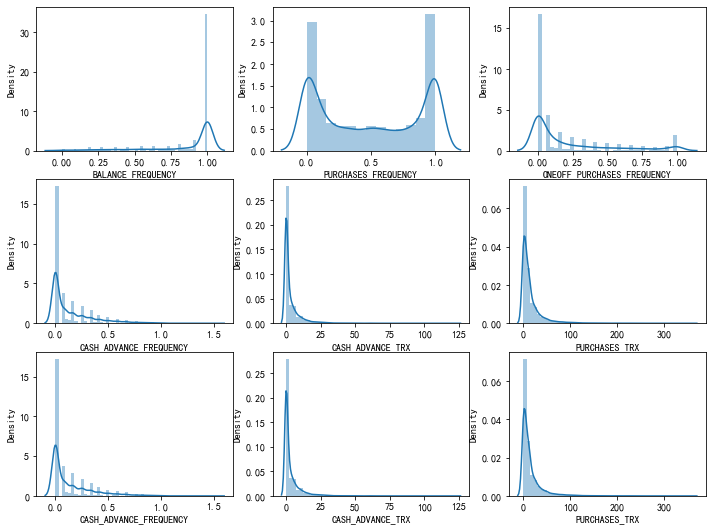

In [17]:
fig,axes=plt.subplots(3,3,figsize=(12, 9)) 


sns.distplot(CC_GENERAL['BALANCE_FREQUENCY'].values,ax=axes[0,0],axlabel="BALANCE_FREQUENCY")
sns.distplot(CC_GENERAL['PURCHASES_FREQUENCY'].values, ax=axes[0,1],axlabel="PURCHASES_FREQUENCY") 
sns.distplot(CC_GENERAL['ONEOFF_PURCHASES_FREQUENCY'].values, ax=axes[0,2],axlabel="ONEOFF_PURCHASES_FREQUENCY") 

sns.distplot(CC_GENERAL['CASH_ADVANCE_FREQUENCY'].values, ax=axes[1,0],axlabel="CASH_ADVANCE_FREQUENCY")  
sns.distplot(CC_GENERAL['CASH_ADVANCE_TRX'].values, ax=axes[1,1],axlabel="CASH_ADVANCE_TRX") 
sns.distplot(CC_GENERAL['PURCHASES_TRX'].values, ax=axes[1,2],axlabel="PURCHASES_TRX")  


sns.distplot(CC_GENERAL['CASH_ADVANCE_FREQUENCY'].values, ax=axes[2,0],axlabel="CASH_ADVANCE_FREQUENCY")  
sns.distplot(CC_GENERAL['CASH_ADVANCE_TRX'].values, ax=axes[2,1],axlabel="CASH_ADVANCE_TRX")  
sns.distplot(CC_GENERAL['PURCHASES_TRX'].values, ax=axes[2,2],axlabel="PURCHASES_TRX") 

From the histogram density graph, it can be seen that all continuous fields have a serious right-skewed distribution, so it needs to be transformed into a function to make it obey the normal distribution, so as to improve the effect of clustering.

# Standardization: Demeaning, Variance Scaling

In [18]:
from sklearn import preprocessing as prep

for i in ['CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PRC_FULL_PAYMENT','TENURE','PURCHASES_Rate','INSTALLMENTS_Rate','CASH_ADVANCE_Rate']:
    CC_GENERAL[i]=np.log1p(CC_GENERAL[i])
    CC_GENERAL[i]=prep.StandardScaler().fit_transform(CC_GENERAL[i].values.reshape(-1,1))

for j in ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY']:
    CC_GENERAL[j]=prep.StandardScaler().fit_transform(CC_GENERAL[j].values.reshape(-1,1))

# Cluster Analysis

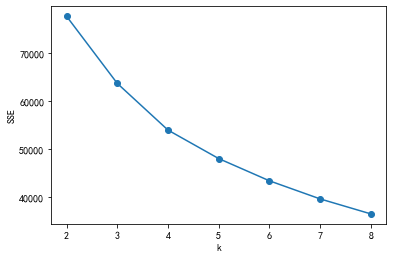

In [19]:
from sklearn.cluster import KMeans 

cols = [ 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PRC_FULL_PAYMENT', 'TENURE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']


SSE = []  
for k in range(2,9):  
    estimator = KMeans(n_clusters=k) 
    estimator.fit(CC_GENERAL[cols])  
    SSE.append(estimator.inertia_)  
X = range(2,9)  
plt.xlabel('k')  
plt.ylabel('SSE')  
plt.plot(X,SSE,'o-')  
plt.show()  

As can be seen from the elbow curve, the number of optimal clustering is 5. And then we can get five centroids

In [20]:
estimator = KMeans(n_clusters=5)  # construct a clusterer  
estimator.fit(CC_GENERAL[cols])  

KMeans(n_clusters=5)

In [21]:
estimator.cluster_centers_ #KMeans centroids

array([[ 0.41715632,  1.03916455,  1.95113232, -0.38982766, -0.41542303,
         1.18487037,  0.61386882,  0.42086593,  0.21303005,  1.03916455,
         1.95113232, -0.38982766],
       [ 0.33601254, -1.03023659, -0.5226401 ,  0.08234319,  0.3044524 ,
        -0.9993491 , -0.23750282, -0.46563153,  0.04840732, -1.03023659,
        -0.5226401 ,  0.08234319],
       [ 0.29620698,  0.78459294, -0.31503289, -0.52902122, -0.56939384,
         0.60251443, -0.23286478,  0.24688372,  0.02506921,  0.78459294,
        -0.31503289, -0.52902122],
       [-2.18726661, -0.58793085, -0.43978515, -0.52880657, -0.55915628,
        -0.45630271, -0.19914768,  0.25015667, -0.11764537, -0.58793085,
        -0.43978515, -0.52880657],
       [ 0.35713693, -0.41236685, -0.1878465 ,  2.0481672 ,  1.76053592,
        -0.37118319,  0.45116023, -0.40268389, -0.29482291, -0.41236685,
        -0.1878465 ,  2.0481672 ]])

In [22]:
CC_GENERAL['labels'] = estimator.labels_

In [23]:
CC_GENERAL['labels']

0       1
1       1
2       0
3       1
4       1
       ..
8945    2
8946    2
8947    2
8948    1
8949    0
Name: labels, Length: 8950, dtype: int32

In [24]:

print(CC_GENERAL['labels'] .value_counts())
type(CC_GENERAL['labels'] .value_counts())

print(CC_GENERAL['labels'] .value_counts().to_numpy())
print(CC_GENERAL['labels'] .value_counts().index.to_numpy())

2    2716
1    2373
0    1461
3    1205
4    1195
Name: labels, dtype: int64
[2716 2373 1461 1205 1195]
[2 1 0 3 4]


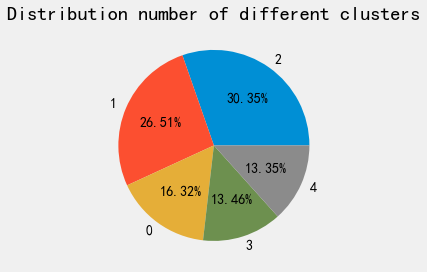

In [25]:
plt.style.use('fivethirtyeight')

cnt = CC_GENERAL['labels'] .value_counts().to_numpy()
label = CC_GENERAL['labels'] .value_counts().index.to_numpy()

plt.pie(cnt, labels=label, autopct='%1.2f%%')
plt.title('Distribution number of different clusters')
plt.tight_layout()
plt.show()

# View and Analyze the relationship between BALANCE_FREQUENCY CREDIT_LIMIT and PRCFULLPAYMENT

In [27]:
selectCenter=estimator.cluster_centers_[:,[0,6,7]]
print(selectCenter)

[[ 0.41715632  0.61386882  0.42086593]
 [ 0.33601254 -0.23750282 -0.46563153]
 [ 0.29620698 -0.23286478  0.24688372]
 [-2.18726661 -0.19914768  0.25015667]
 [ 0.35713693  0.45116023 -0.40268389]]


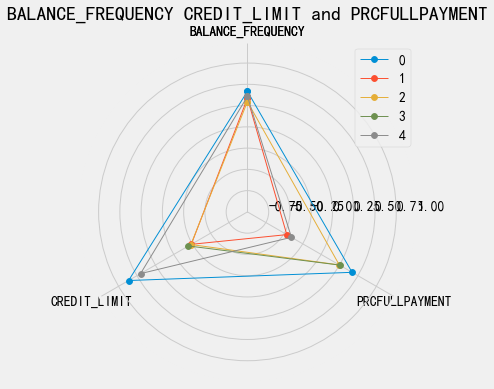

In [31]:
selectCenter=estimator.cluster_centers_[:,[0,6,7]] 
colsName=['BALANCE_FREQUENCY','CREDIT_LIMIT','PRCFULLPAYMENT']



data_length = len(colsName)

angles = np.linspace(0, 2*np.pi, data_length, endpoint=False)
labels = ['BALANCE_FREQUENCY','CREDIT_LIMIT','PRCFULLPAYMENT']
score = selectCenter

score_a = np.concatenate((score[0], [score[0][0]]))
score_b = np.concatenate((score[1], [score[1][0]]))
score_c = np.concatenate((score[2], [score[2][0]]))
score_d = np.concatenate((score[3], [score[3][0]]))
score_e = np.concatenate((score[4], [score[4][0]]))
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))

fig = plt.figure(figsize=(8, 6), dpi=70)

ax = plt.subplot(111, polar=True)

ax.plot(angles, score_a,'o-',linewidth=1)
ax.plot(angles, score_b,'o-',linewidth=1)
ax.plot(angles, score_c,'o-',linewidth=1)
ax.plot(angles, score_d,'o-',linewidth=1)
ax.plot(angles, score_e,'o-',linewidth=1)

ax.set_thetagrids(angles*180/np.pi, labels)

ax.set_theta_zero_location('N') 
ax.set_rlim(-1, 1)   
ax.set_rlabel_position(270)
ax.set_title("BALANCE_FREQUENCY CREDIT_LIMIT and PRCFULLPAYMENT")
plt.legend(["0", "1", "2", "3", "4"], loc='best')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22276\1770811821.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=selectCenter[i][0], ys=selectCenter[i][1], zs=selectCenter[i][2],


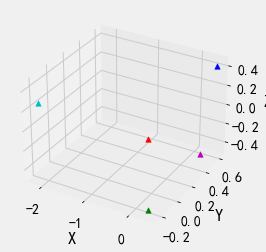

In [32]:



fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(5):
    ax.scatter(xs=selectCenter[i][0], ys=selectCenter[i][1], zs=selectCenter[i][2], 
               zdir='z', s=30, c=colors[i], depthshade=True, cmap="jet", marker="^")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

(1) Cardholders in cluster 0 have moderate credit limit, high frequency of balance changes, and low full repayment ratio;
(2) Cardholders in cluster 1 have low credit limits, low frequency of balance changes, and a medium proportion of full repayment;
(3) Cardholders in cluster 2 have low credit limit, moderate frequency of balance changes, and high proportion of full repayment;
(4) Cardholders in cluster 3 have a relatively high credit limit, a relatively high frequency of balance changes, and a relatively low proportion of full repayment;
(5) Cardholders in cluster 4 have relatively high credit limit, relatively low frequency of balance changes, and relatively high proportion of full repayment.

# View and analyse the relationship between ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY and CASHA_DVANCE_FREQUENCY.

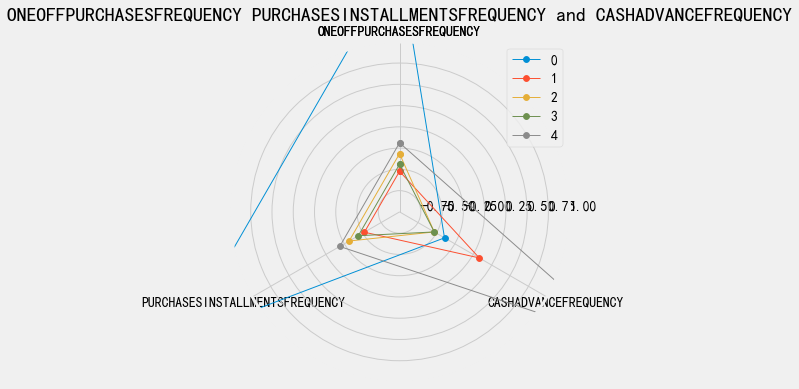

In [34]:
usecols2=['ONEOFFPURCHASESFREQUENCY','PURCHASESINSTALLMENTSFREQUENCY','CASHADVANCEFREQUENCY']

selectCenter=estimator.cluster_centers_[:,[2,10,11]]



data_length = len(colsName)

angles = np.linspace(0, 2*np.pi, data_length, endpoint=False)
labels = ['ONEOFFPURCHASESFREQUENCY','PURCHASESINSTALLMENTSFREQUENCY','CASHADVANCEFREQUENCY']
score = selectCenter

score_a = np.concatenate((score[0], [score[0][0]]))
score_b = np.concatenate((score[1], [score[1][0]]))
score_c = np.concatenate((score[2], [score[2][0]]))
score_d = np.concatenate((score[3], [score[3][0]]))
score_e = np.concatenate((score[4], [score[4][0]]))
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))

fig = plt.figure(figsize=(8, 6), dpi=70)

ax = plt.subplot(111, polar=True)

ax.plot(angles, score_a,'o-',linewidth=1)
ax.plot(angles, score_b,'o-',linewidth=1)
ax.plot(angles, score_c,'o-',linewidth=1)
ax.plot(angles, score_d,'o-',linewidth=1)
ax.plot(angles, score_e,'o-',linewidth=1)

ax.set_thetagrids(angles*180/np.pi, labels)

ax.set_theta_zero_location('N')  # E W S N SW SE NW NE

ax.set_rlim(-1, 1)
ax.set_rlabel_position(270)
ax.set_title("ONEOFFPURCHASESFREQUENCY PURCHASESINSTALLMENTSFREQUENCY and CASHADVANCEFREQUENCY")
plt.legend(["0", "1", "2", "3", "4"], loc='best')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22276\2398378458.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=selectCenter[i][0], ys=selectCenter[i][1], zs=selectCenter[i][2],


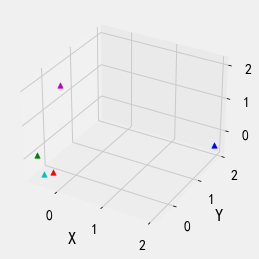

In [35]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']


for i in range(5):
    ax.scatter(xs=selectCenter[i][0], ys=selectCenter[i][1], zs=selectCenter[i][2], 
               zdir='z', s=30, c=colors[i], depthshade=True, cmap="jet", marker="^")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

(1) Cardholders in cluster 0 have moderate purchases, low installment purchases, and high cash advance;
(2) Cardholders in cluster 1 have low purchases, moderate installment purchases, and moderate cash advance;
(3) Cardholders in cluster 2 and cluster 4 have high purchases, high installment purchases, and low cash advance;
(4) The cardholders in cluster 3 have relatively low purchases, relatively low installment purchases, and  relatively high cash advance .